In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial

# MNSIT

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data() # num_words=10_000 to limit to 10_000 most frequent words
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000] # all data till last 5000
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:] # last 5000

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
X_train[0].shape

(28, 28)

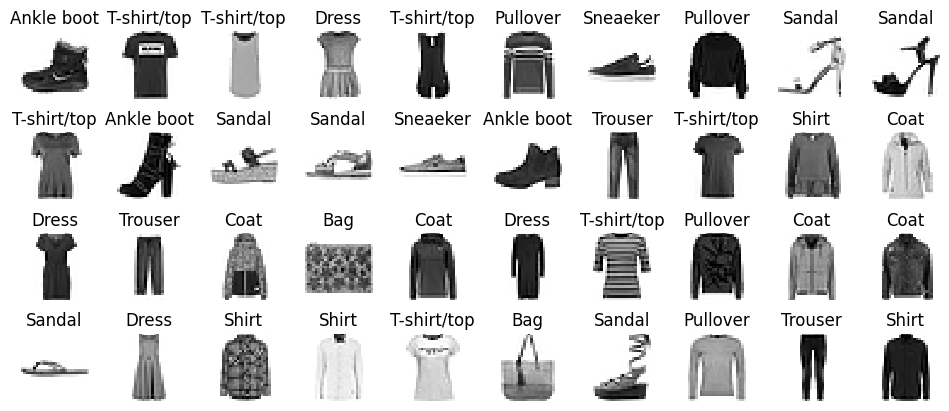

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaeker", "Bag", "Ankle boot"]

n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2,n_rows * 1.2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt. show()

In [ ]:
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

- Input shape does NOT include batchsize
- X_train[0].shape to know shape of inputlayer
- Flatten() turns each input image into 1D array

Two ways of creating Sequential Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Instead of adding an InputLayer -> you can use input_shape in the first layer

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## See layers, weights, biases of model

In [ ]:
model.layers

Here, you can do function on layer (layer.add_weight() for example) -> CTRL + SPACE to see all options

In [ ]:
for layer in model.layers:
  print(layer)

In [ ]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

((784, 300), (300,))

Calculate # of params per layer

In [ ]:
weights.shape[0] * weights.shape[1] + biases.shape[0] # for first dense layer

235500

### Loss

- sparse_categorical_crossentropy (if y is NOT one-hot-encoded)
- categorical_crossentropy
- binary_crossentropy

2 ways: tf.keras.losses.OPTION

### Optimizer

2 ways: "sgd" or tf.keras.optimizers.OPTION(params)

### Metrics

also 2 ways: "accuracy" or tf.keras.metrics.OPTION

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd", # optimizer=optimizer
    metrics=["accuracy"]
)

In [ ]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.7251 - accuracy: 0.7646 - val_loss: 0.5184 - val_accuracy: 0.8192
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4871 - accuracy: 0.8307 - val_loss: 0.4482 - val_accuracy: 0.8416
Epoch 3/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4410 - accuracy: 0.8467 - val_loss: 0.4533 - val_accuracy: 0.8424
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4146 - accuracy: 0.8560 - val_loss: 0.3970 - val_accuracy: 0.8564
Epoch 5/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3940 - accuracy: 0.8620 - val_loss: 0.3919 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3772 - accuracy: 0.8685 - val_loss: 0.3680 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3655 - accuracy: 0.8714 - val_loss: 0.3780 - val_ac

training parameters

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

dictionary containing loss and extra metrics

In [ ]:
history.history

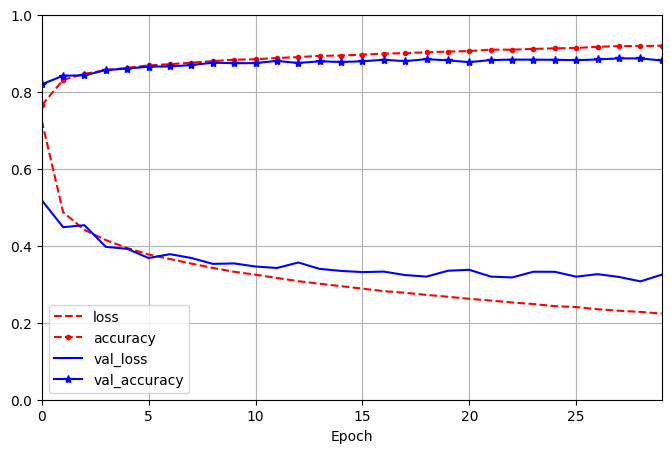

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch", style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3408 - accuracy: 0.8771


[0.34079641103744507, 0.8770999908447266]

In [ ]:
X_new = X_test[:3] # pretend these are new
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 98ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

Other example

In [ ]:
# just example code
array_pred = tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

In [ ]:
np.argmax(array_pred, axis=1)

array([0, 5, 1, 0])

In [ ]:
tf.math.argmax(array_pred, axis=1)

<tf.Tensor: shape=(4,), dtype=int64, numpy=array([0, 5, 1, 0])>

Get actual classnames

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

# Regression MLP (California Housing prices data)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
  housing.data, housing. target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
  X_train_full, y_train_full, random_state=42)

In [ ]:
X_train[0].shape

In [ ]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

In [ ]:
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics="RootMeanSquaredError")
norm_layer.adapt(X_train)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

In [ ]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

In [ ]:
X_new = X_test [:3] # pretend these are new
y_pred = model.predict(X_new)
y_pred

# Wide And Deep Network

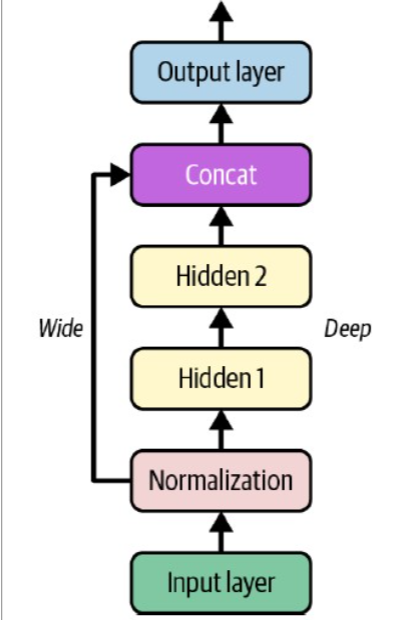

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras. layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

In [ ]:
input_ = tf.keras.layers.Input(shape=X_train.shape[1: ])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

In [ ]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

# Wide And Deep Multiple Inputs and Outputs

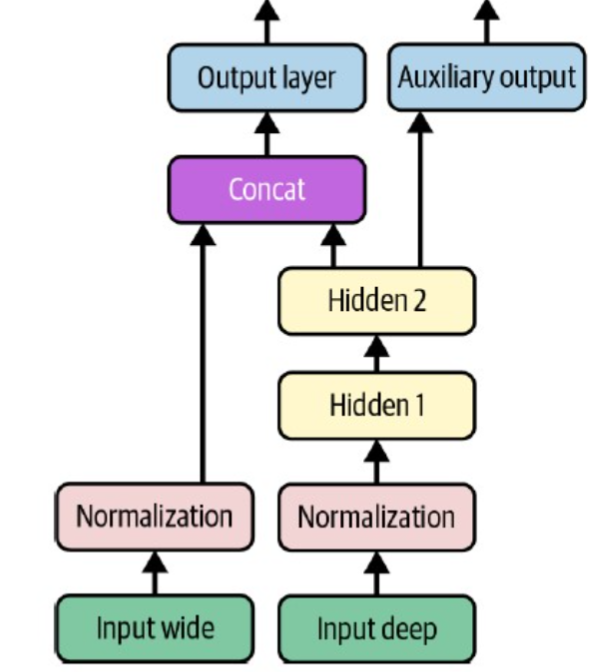

In [ ]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep) # hidden layer is created and called -> less code + more concise code
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output, aux_output])

In [ ]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
# pretend new instances
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

- Compile with 2 losses, 1 for each output (here they are the same, but could be different)
- loss_weights = specifies relative importance of each loss (here main output is more important than auxiliary output)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, metrics=["RootMeanSquaredError"])

Instead of tuple ("mse", "mse")

-> you can pass dictionary

loss={"output":"mse", "aux_output": "mse"}

IF you created the output layers with name="output" and name="aux_output"

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

In [ ]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test)) # can also add return_dict=True -> to get dict back

weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

In [ ]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep)) # returns tuple of predictions, one per output
y_pred_tuple =  model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple)) # turn typle into dict

# Subclassing API

- __init__ method creates layers
- architecture defined in call() method

In [ ]:
class WideAndDeepModel(tf.keras.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
      super().__init__(**kwargs) # needed to support naming the model
      self.norm_layer_wide = tf.keras.layers.Normalization()
      self.norm_layer_deep = tf.keras.layers.Normalization()
      self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
      self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
      self.main_output = tf.keras.layers.Dense(1)
      self.aux_output = tf.keras.layers.Dense(1)


  def call(self, inputs):
    input_wide, input_deep = inputs
    norm_wide = self.norm_layer_wide(input_wide)
    norm_deep = self.norm_layer_deep(input_deep)
    hidden1 = self.hidden1(norm_deep)
    hidden2 = self.hidden2(hidden1)
    concat = tf.keras.layers.concatenate([norm_wide, hidden2])
    output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return output, aux_output

# Callbacks

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_best_only=True)

EarlyStopping: Interreputs training when no progress on validation set is measured for number of epochs (define number with patience=*number*)

When using earlystopping, number of epochs in fit can be set to large value

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model.fit(..., callbacks=[checkpoint_cb, early_stopping_cb])